<!--<img src="../images/oregano_g.png" width="120" align="right"/>-->

<h2>Ordinal Oregano</h2> 
<span text-align="right" style="font-size:4em;float:right">🌿</span>
<h4>Week Eight - Simulation</h4>

<h4>TOC</h4>


<a href="#x">Week Project x</a>
* <a href="#"></a>
* <a href="#"></a>
* <a href="#"></a>
* <a href="#--Fin--">Fin</a>


<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

In [1]:
import numpy as np
%matplotlib inline

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## 

In [2]:
import pandas as pd 

df_mon = pd.read_csv("data/monday.csv", delimiter=";")
df_tue = pd.read_csv("data/tuesday.csv", delimiter=";")
df_wed = pd.read_csv("data/wednesday.csv", delimiter=";")
df_thu = pd.read_csv("data/thursday.csv", delimiter=";")
df_fri = pd.read_csv("data/friday.csv", delimiter=";")

df_mon.insert(1,'weekday','mon')
df_tue.insert(1,'weekday','tue')
df_wed.insert(1,'weekday','wed')
df_thu.insert(1,'weekday','thu')
df_fri.insert(1,'weekday','fri')

df = pd.concat([df_mon,df_tue,df_wed,df_thu,df_fri])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   weekday      24877 non-null  object
 2   customer_no  24877 non-null  int64 
 3   location     24877 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.8+ KB


In [3]:
df_cust_sect_time = df.drop(['timestamp'],axis=1).groupby(['weekday','location']).count()
#df_cust_sect_time = df.groupby(['weekday','location']).count()

df_cust_sect_time.head(6)

customer_no
weekday location             
fri     checkout         1502
        dairy             932
        drinks            844
        fruit            1057
        spices            790
mon     checkout         1437

<AxesSubplot:xlabel='weekday', ylabel='customer_no'>

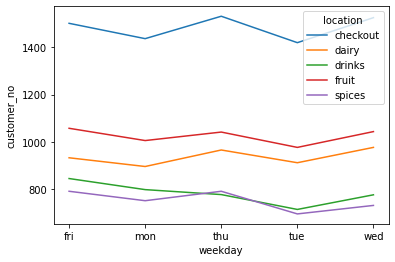

In [4]:
import seaborn as sns

sns.lineplot(data=df_cust_sect_time, x='weekday', y='customer_no', hue='location')

In [5]:
#type(df['timestamp'])

type(df.iloc[0][0])


str

In [6]:
#df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d %H%M%S')

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['date'] = [d.date() for d in df['timestamp']]
df['time'] = [d.time() for d in df['timestamp']]
df = df[['timestamp','date','time','weekday','customer_no','location']]

type(df.iloc[0][0])

df.head()

,timestamp,date,time,weekday,customer_no,location
0,2019-09-02 07:03:00,2019-09-02,07:03:00,mon,1,dairy
1,2019-09-02 07:03:00,2019-09-02,07:03:00,mon,2,dairy
2,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,3,dairy
3,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,4,dairy
4,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,5,spices


In [7]:
### create distinct customer_ids
df['distinct_cust_id'] = df['weekday']+'_cust_'+df['customer_no'].astype(str)

df.head(12)

,timestamp,date,time,weekday,customer_no,location,distinct_cust_id
0,2019-09-02 07:03:00,2019-09-02,07:03:00,mon,1,dairy,mon_cust_1
1,2019-09-02 07:03:00,2019-09-02,07:03:00,mon,2,dairy,mon_cust_2
2,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,3,dairy,mon_cust_3
3,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,4,dairy,mon_cust_4
4,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,5,spices,mon_cust_5
5,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,6,spices,mon_cust_6
6,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,7,spices,mon_cust_7
7,2019-09-02 07:04:00,2019-09-02,07:04:00,mon,8,fruit,mon_cust_8
8,2019-09-02 07:05:00,2019-09-02,07:05:00,mon,1,checkout,mon_cust_1
9,2019-09-02 07:05:00,2019-09-02,07:05:00,mon,5,checkout,mon_cust_5


In [8]:
#for row in df.head(5).itertuples():

for i, row in df.iloc[:1].iterrows():
    print(f'row[0] is: {row[0]}')
    print(f'row[1] is: {row[1]}')
    print(f'row[2] is: {row[2]}')
    print(f'row[3] is: {row[3]}')
    print(f'row[4] is: {row[4]}')
    print(f'row[5] is: {row[5]}')
    print(f'row[6] is: {row[6]}\n')
#    print(f'row[7] is: {row[7]}')
#    print(f'row[8] is: {row[8]}')
#    print(f'row[9] is: {row[9]}\n')


row[0] is: 2019-09-02 07:03:00
row[1] is: 2019-09-02
row[2] is: 07:03:00
row[3] is: mon
row[4] is: 1
row[5] is: dairy
row[6] is: mon_cust_1



In [18]:
###for alternative 2
df.iloc[1:2]

,timestamp,date,time,weekday,customer_no,location,distinct_cust_id
1,2019-09-02 07:03:00,2019-09-02,07:03:00,mon,2,dairy,mon_cust_2


In [9]:
### another try
#for row in df.iloc[:3].iterrows():
#    print(f'row[0] is: {row[0]}')
#    print(f'row[1] is: {row[1]}')
##    print(f'row[2] is: {row[2]}')
##    print(f'row[3] is: {row[3]}')
##    print(f'row[4] is: {row[4]}')
##    print(f'row[5] is: {row[5]}')
##    print(f'row[6] is: {row[6]}\n')
##    print(f'row[7] is: {row[7]}')
##    print(f'row[8] is: {row[8]}')
##    print(f'row[9] is: {row[9]}\n')


In [10]:
### aggregate data for each customer into a single row
### alternative 1

'''distinct_cust_l = []
distinct_cust_timestamp_l = []

distinct_cust_data = pd.DataFrame()
distinct_cust_checkout = pd.DataFrame()

for i, row in df.iterrows():
    timestamp = row[0]
    time = row[2]
    weekday = row[3]
    location = row[5]
    customer = row[6]
    if customer not in distinct_cust_l:
        distinct_cust_l.append(customer)
        if timestamp not in distinct_cust_data:
            distinct_cust_timestamp_l.append(timestamp)
            entry = timestamp
            info = {'weekday' : weekday,
                    'customer' : customer,
                    'locations' : location,
                    'entry' : timestamp}
            distinct_cust_data = distinct_cust_data.append(info, ignore_index=True)
    else:
        if row[5] == 'checkout':
            checkout = timestamp
            info = {
                    'customer' : customer,
                    'checkout' : timestamp}
            distinct_cust_checkout = distinct_cust_checkout.append(info, ignore_index=True)'''


In [ ]:
### aggregate data for each customer into a single row
### alternative 1

distinct_cust_l = []
distinct_cust_timestamp_l = []

distinct_cust_data = pd.DataFrame()
distinct_cust_checkout = pd.DataFrame()

for i, row in df.iterrows():
    timestamp = row[0]
    time = row[2]
    weekday = row[3]
    location = row[5]
    customer = row[6]
    if customer not in distinct_cust_l:
        distinct_cust_l.append(customer)
        if row[5] == 'checkout':
            distinct_cust_timestamp_l.append(timestamp)
            entry = timestamp
        info = {'weekday' : weekday,
                'customer' : customer,
                'locations' : location,
                'entry' : timestamp}
        distinct_cust_data = distinct_cust_data.append(info, ignore_index=True)
    else:
        if row[5] == 'checkout':
            checkout = timestamp
            info = {
                    'customer' : customer,
                    'checkout' : timestamp}
            distinct_cust_checkout = distinct_cust_checkout.append(info, ignore_index=True)



In [11]:
distinct_cust_data.head(10)

,weekday,customer,entry
0,mon,mon_cust_1,2019-09-02 07:03:00
1,mon,mon_cust_2,2019-09-02 07:03:00
2,mon,mon_cust_3,2019-09-02 07:04:00
3,mon,mon_cust_4,2019-09-02 07:04:00
4,mon,mon_cust_5,2019-09-02 07:04:00
5,mon,mon_cust_6,2019-09-02 07:04:00
6,mon,mon_cust_7,2019-09-02 07:04:00
7,mon,mon_cust_8,2019-09-02 07:04:00
8,mon,mon_cust_9,2019-09-02 07:06:00
9,mon,mon_cust_10,2019-09-02 07:06:00


In [12]:
distinct_cust_checkout.head(10)

,customer,checkout
0,mon_cust_1,2019-09-02 07:05:00
1,mon_cust_5,2019-09-02 07:05:00
2,mon_cust_2,2019-09-02 07:06:00
3,mon_cust_3,2019-09-02 07:06:00
4,mon_cust_8,2019-09-02 07:07:00
5,mon_cust_4,2019-09-02 07:08:00
6,mon_cust_10,2019-09-02 07:08:00
7,mon_cust_11,2019-09-02 07:08:00
8,mon_cust_14,2019-09-02 07:09:00
9,mon_cust_12,2019-09-02 07:10:00


In [13]:
distinct_cust_data['checkout'] = np.nan
distinct_cust_data = distinct_cust_data.reset_index().set_index('customer')
distinct_cust_checkout = distinct_cust_checkout.reset_index().set_index('customer')

distinct_cust_data['checkout'].fillna(distinct_cust_checkout['checkout'], inplace=True)

distinct_cust_data = distinct_cust_data.reset_index().set_index('index')

In [14]:
distinct_cust_data.isna().groupby('weekday').sum()


,customer,entry,checkout
weekday,,,
False,0,0,28


In [15]:
distinct_cust_data[distinct_cust_data['checkout'].isnull()]

NameError: name 'distinct_cust_duration' is not defined

In [ ]:
distinct_cust_data.value_counts()

In [ ]:
type(distinct_cust_data.value_counts)

In [ ]:
type(distinct_cust_data.nunique)

In [ ]:
distinct_cust_data.groupby('weekday')['checkout'].value_counts()

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## 

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## 

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

# - Fin -

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## 

<a href='#TOC' style="margin:45%;margin-bottom-50px;padding:5px;border:0px solid #190000;border-radius:5px;background-color:rgba(195,105,5,0.95);color:#fff;text-decoration:none;">
<span style="font-size:1.2em">&uarr; TOP &uarr;</span>
</a>
<hr style="margin-top:-15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">